In [1]:
import numpy as np

import scipy as sp

from statsmodels.stats.diagnostic import lilliefors
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.distributions.empirical_distribution import ECDF

import matplotlib.pyplot as plt

jtplot.style(figsize=(15, 9))

In [4]:
data.sf(x_0), data.isf(data.sf(x_0)), data.cdf(x_0), data.ppf(data.cdf(x_0))

(0.0477903522728147, 5.000000000000002, 0.9522096477271853, 5.000000000000002)

In [24]:
1 - data.cdf(x_0) # SF(x_0)

0.047790352272814696

Text(0.5, 1.0, 'ISF of Normal Distribution')

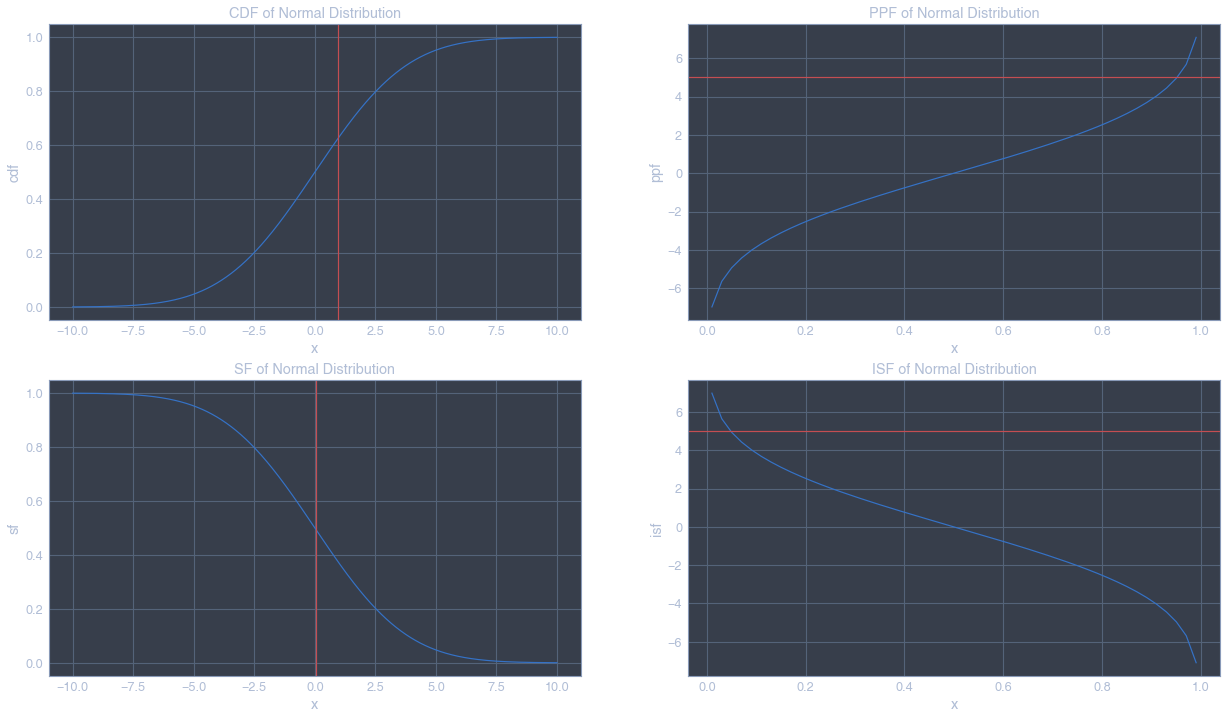

In [3]:
data = sp.stats.norm(0, 3)
x = np.linspace(-10, 10, 1_000)
x_0 = 5

fig, axs = plt.subplots(2, 2, figsize=(21, 12))

axs[0, 0].plot(x, data.cdf(x))
axs[0, 0].axvline(data.cdf(x_0), c='r')
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('cdf')
axs[0, 0].set_title('CDF of Normal Distribution')

axs[0, 1].plot(x, data.ppf(x))
axs[0, 1].axhline(data.ppf(data.cdf(x_0)), c='r')
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('ppf')
axs[0, 1].set_title('PPF of Normal Distribution')

axs[1, 0].plot(x, data.sf(x))
axs[1, 0].axvline(data.sf(x_0), c='r')
axs[1, 0].set_xlabel('x')
axs[1, 0].set_ylabel('sf')
axs[1, 0].set_title('SF of Normal Distribution')

axs[1, 1].plot(x, data.isf(x))
axs[1, 1].axhline(data.isf(data.sf(x_0)), c='r')
axs[1, 1].set_xlabel('x')
axs[1, 1].set_ylabel('isf')
axs[1, 1].set_title('ISF of Normal Distribution')

## Normality Test

Тесты:
 - Колмогорова-Смирнова (Kolmogorov-Smirnov test)
 - Колмогорова-Смирнова с поправкой Лиллиефорса (Lilliefors test)
 - Шапиро-Уилка (Shapiro-Wilk test)  
 -  Андерсона-Дарлинга (Anderson-Darling test)
 -  Крамера-Мизеса (Сramer-von Mises test) 
 -  на асимметричность и эксцессы (D’Agostino skewness test,  Anscombe-Glynn kurtosis test)
 - Харке-Бера (Jarque-Bera test)

### Data

In [2]:
np.random.seed(0)

In [3]:
log_normal = np.random.lognormal(0, 2, 1000)
normal = np.random.randn(1000)

In [4]:
def print_result(stat, pval):
    return f'statistic : {round(stat, 5)}, p-value: {round(pval, 5)}'

In [5]:
def h0_or_h1(pvalue):
    return 'HA' if pvalue < 0.05 else 'H0'

### Kolmogorov-Smirnov test

In [37]:
n_stat, n_pval = sp.stats.kstest(log_normal, 'norm')
stat, pval = sp.stats.kstest(normal, 'norm')
print_result(n_stat, n_pval), print_result(stat, pval)

('statistic : 0.5009, p-value: 0.0', 'statistic : 0.01926, p-value: 0.8449')

In [34]:
s, p = sp.stats.ks_2samp(normal, log_normal) # from the same distributions or not
print_result(s, p), h0_or_h1(p)

('statistic : 0.487 p-value: 0.0', 'HA')

In [38]:
s, p = sp.stats.ks_2samp(np.random.lognormal(0, 2, 1000), log_normal)
print_result(s, p), h0_or_h1(p)

('statistic : 0.028, p-value: 0.82822', 'H0')

In [39]:
s, p = sp.stats.ks_2samp(np.random.randn(1000), normal)
print_result(s, p), h0_or_h1(p)

('statistic : 0.033, p-value: 0.64781', 'H0')

#### Kolmogorov-Smirnov test by hands

In [ ]:
# ecdf = ECDF(data)
# ecdf(np.linspace(-10, 10))

In [10]:
def kolm(data):
    ecdf = []
    X = np.linspace(-10, 10)
    for x in X:
        x_sum = 0
        for i in data:
            x_sum += np.heaviside(x-i, 1)
        r = x_sum/len(data)
        ecdf.append(r)
    
    normal_cdf = sp.stats.norm(0, 1)
    stat = np.max(np.abs(ecdf - normal_cdf.cdf(X)))+0.00265
    
    return stat


In [7]:
stat, pval = sp.stats.kstest(data, 'norm')
print_result(stat, pval)

'statistic : 0.02929, p-value: 0.48953'

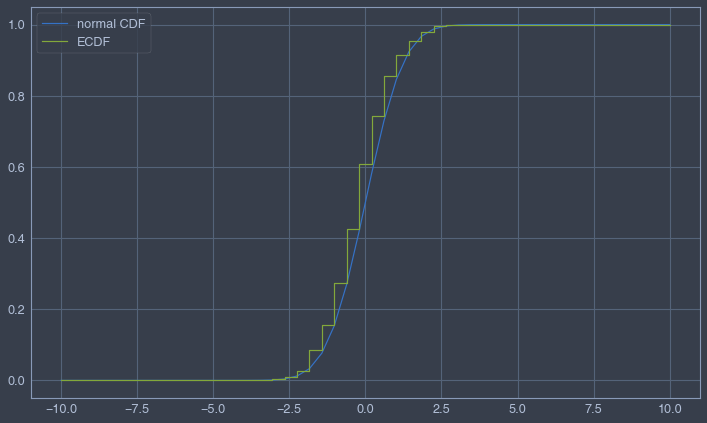

In [9]:
plt.plot(X, normal_cdf.cdf(X), label='normal CDF')
plt.step(X, ecdf, label='ECDF')
plt.legend()

In [11]:
my_kolm = []
kolm_ = []
for i in range(100):
    data = np.take(normal, np.random.randint(0, len(normal), int(len(normal)*0.8)))
    my_kolm.append(kolm(data))
    stat, _ = sp.stats.kstest(data, 'norm')
    kolm_.append(stat)

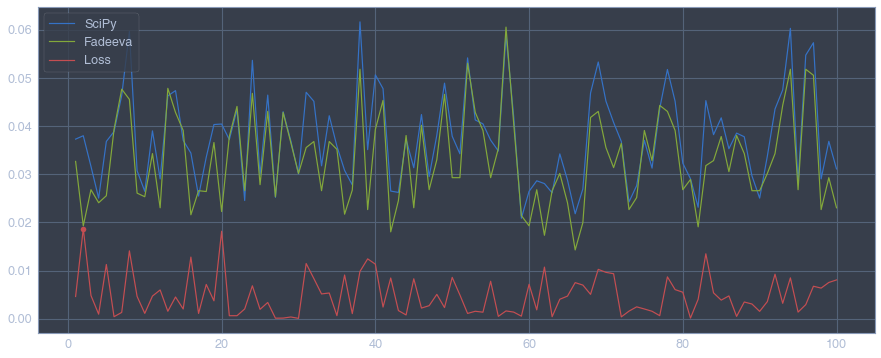

In [33]:
plt.figure(figsize=(15, 6))
plt.plot(np.linspace(1, 100, 100), kolm_, label='SciPy')
plt.plot(np.linspace(1, 100, 100), my_kolm, label='Fadeeva')

plt.plot(np.linspace(1, 100, 100), np.abs(np.array(my_kolm) - np.array(kolm_)), label='Loss', c='r')
plt.plot(np.argmax(np.abs(np.array(my_kolm) - np.array(kolm_)))+1,
         (np.abs(np.array(my_kolm) - np.array(kolm_))).max(), 'o', color='r')

plt.legend()

### Lilliefors test

In [41]:
n_stat, n_pval = lilliefors(log_normal)
print_result(n_stat, n_pval), h0_or_h1(n_pval)

('statistic : 0.37576, p-value: 0.001', 'HA')

In [42]:
n_stat, n_pval = lilliefors(normal)
print_result(n_stat, n_pval), h0_or_h1(n_pval)

('statistic : 0.01648, p-value: 0.79861', 'H0')

### Shapiro-Wilk test

In [45]:
n_stat, n_pval = sp.stats.shapiro(log_normal)
print_result(n_stat, n_pval), h0_or_h1(n_pval)

('statistic : 0.31343, p-value: 0.0', 'HA')

In [47]:
stat, pval = sp.stats.shapiro(normal)
print_result(stat, pval), h0_or_h1(pval)

('statistic : 0.99878, p-value: 0.74041', 'H0')

### Anderson-Darling test

In [50]:
n_stat, n_pval = normal_ad(log_normal)
print_result(n_stat, n_pval), h0_or_h1(n_pval)

f:\python\lib\site-packages\statsmodels\stats\_adnorm.py:70: RuntimeWarning: divide by zero encountered in log1p
  s = np.sum((2 * i[sl1] - 1.0) / nobs * (np.log(z) + np.log1p(-z[sl2])),


('statistic : inf, p-value: 0.0', 'HA')

In [51]:
stat, pval = normal_ad(normal)
print_result(stat, pval), h0_or_h1(pval)

('statistic : 0.28588, p-value: 0.62477', 'H0')

In [58]:
from statsmodels.stats.diagnostic import anderson_statistic

stat = anderson_statistic(normal)
stat

0.28587945679248605

### Сramer-von Mises test

In [9]:
res = sp.stats.cramervonmises(log_normal, 'norm')
print_result(res.statistic, res.pvalue), h0_or_h1(res.pvalue)

('statistic : 98.41755, p-value: 0.0', 'HA')

In [10]:
res = sp.stats.cramervonmises(normal, 'norm')
print_result(res.statistic, res.pvalue), h0_or_h1(res.pvalue)

('statistic : 0.07451, p-value: 0.72431', 'H0')

### D’Agostino skewness test, Anscombe-Glynn kurtosis test

#### Skewtest

In [12]:
n_stat, n_pval = sp.stats.skewtest(log_normal)
print_result(n_stat, n_pval), h0_or_h1(n_pval)

('statistic : 30.5185, p-value: 0.0', 'HA')

In [13]:
stat, pval = sp.stats.skewtest(normal)
print_result(stat, pval), h0_or_h1(pval)

('statistic : 0.72315, p-value: 0.46959', 'H0')

#### Kurtosis

In [15]:
n_stat, n_pval = sp.stats.kurtosistest(log_normal)
print_result(n_stat, n_pval), h0_or_h1(n_pval)

('statistic : 19.4983, p-value: 0.0', 'HA')

In [16]:
stat, pval = sp.stats.kurtosistest(normal)
print_result(stat, pval), h0_or_h1(pval)

('statistic : -0.62569, p-value: 0.53152', 'H0')

### Jarque-Bera test

In [17]:
n_stat, n_pval = sp.stats.jarque_bera(log_normal)
print_result(n_stat, n_pval), h0_or_h1(n_pval)

('statistic : 182365.30414, p-value: 0.0', 'HA')

In [18]:
stat, pval = sp.stats.jarque_bera(normal)
print_result(stat, pval), h0_or_h1(pval)

('statistic : 0.9972, p-value: 0.60738', 'H0')

## Testing Tests

In [34]:
from collections import defaultdict
hypo = defaultdict(list)

for _ in range(100):
    for frac in np.arange(0.95, .15, -.15):
        arr = np.take(normal, np.random.randint(0, len(normal), int(len(normal)*frac)))
        
        stat, pval = sp.stats.kstest(arr, 'norm')
        hypo['Kolmogorov'].append(h0_or_h1(pval))

        stat, pval = lilliefors(arr)
        hypo['Lilliefors'].append(h0_or_h1(pval))

        stat, pval = sp.stats.shapiro(arr)
        hypo['Shapiro'].append(h0_or_h1(pval))

        stat, pval = normal_ad(arr)
        hypo['Anderson-Darling'].append(h0_or_h1(pval))

        res = sp.stats.cramervonmises(arr, 'norm')
        hypo['Сramer-von Mises'].append(h0_or_h1(pval))

        n_stat, n_pval = sp.stats.jarque_bera(arr)
        hypo['Jarque-Bera'].append(h0_or_h1(pval))

tests = len(hypo['Kolmogorov'])
for key, value in hypo.items():
    print(f"{key}: {value.count('HA')}/{tests}")

Kolmogorov: 72/600
Lilliefors: 85/600
Shapiro: 95/600
Anderson-Darling: 79/600
Сramer-von Mises: 79/600
Jarque-Bera: 79/600


In [33]:
# kolm = np.array(hypo['Lilliefors']).reshape(100, 6).T
# unique, counts = np.unique(kolm, return_counts=True)
# dict(zip(unique, counts))

{'H0': 498, 'HA': 102}

In [35]:
for key, val in hypo.items():
    hypo[key] = np.array(val).reshape(100, 6).T

In [36]:
for test in hypo:
    print(test)
    for n, frac in enumerate(np.arange(0.95, .15, -.15)):
        unique, counts = np.unique(hypo[test][n], return_counts=True)
        print(f'{np.round(frac, 2):<5}: {dict(zip(unique, counts))}')
    print('-'*30)
    

Kolmogorov
0.95 : {'H0': 82, 'HA': 18}
0.8  : {'H0': 83, 'HA': 17}
0.65 : {'H0': 85, 'HA': 15}
0.5  : {'H0': 91, 'HA': 9}
0.35 : {'H0': 92, 'HA': 8}
0.2  : {'H0': 95, 'HA': 5}
------------------------------
Lilliefors
0.95 : {'H0': 77, 'HA': 23}
0.8  : {'H0': 78, 'HA': 22}
0.65 : {'H0': 88, 'HA': 12}
0.5  : {'H0': 91, 'HA': 9}
0.35 : {'H0': 87, 'HA': 13}
0.2  : {'H0': 94, 'HA': 6}
------------------------------
Shapiro
0.95 : {'H0': 73, 'HA': 27}
0.8  : {'H0': 77, 'HA': 23}
0.65 : {'H0': 85, 'HA': 15}
0.5  : {'H0': 90, 'HA': 10}
0.35 : {'H0': 84, 'HA': 16}
0.2  : {'H0': 96, 'HA': 4}
------------------------------
Anderson-Darling
0.95 : {'H0': 74, 'HA': 26}
0.8  : {'H0': 82, 'HA': 18}
0.65 : {'H0': 87, 'HA': 13}
0.5  : {'H0': 92, 'HA': 8}
0.35 : {'H0': 89, 'HA': 11}
0.2  : {'H0': 97, 'HA': 3}
------------------------------
Сramer-von Mises
0.95 : {'H0': 74, 'HA': 26}
0.8  : {'H0': 82, 'HA': 18}
0.65 : {'H0': 87, 'HA': 13}
0.5  : {'H0': 92, 'HA': 8}
0.35 : {'H0': 89, 'HA': 11}
0.2  : {'